# 1

#### 1: Na Random Forest, sempre que você fizer uma árvore, você faz uma árvore em tamanho real. Algumas árvores podem ser maiores que outras, mas não existe uma profundidade máxima predeterminada. Todavia, uma floresta de árvores feita com AdaBoost, as árvores geralmente são apenas um nó e duas folhas. Uma árvore com apenas um nó e duas folhas é chamada de toco, então a floresta de árvores é na verdade apenas uma Floresta de Tocos.
#### 2: A Random Forest é muito melhor para fazer classificações precisas.  Os tocos não são bons para fazer classificações precisas,  a Random Forest usa todas as variáveis fornecidas na tabela de dados, mas o AdaBoost usa apenas uma variável para tomar uma decisão. 
#### 3: Em uma Random Forest, cada árvore tem voto igual na classificação final. Qualquer árvore de qualquer tamanho tem o mesmo peso de voto. Por outro lado, em uma Floresta de Tocos feita com AdaBoost, alguns tocos têm mais voz na classificação final do que outros. No diagrama, os tocos maiores têm mais voz do que os tocos menores.
#### 4: Na Random Forest, cada árvore de decisão é feita independentemente das demais. Em outras palavras, não importa qual árvore foi feita e em que curva. Por outro lado, numa Floresta de Tocos feita com AdaBoost, a ordem é importante. Os erros que o primeiro coto comete influenciam como o segundo coto é feito, os erros do segundo coto influenciam o terceiro coto e assim por diante.
#### 5: Random Forest é bastante versátil e funciona bem com dados categóricos e numéricos. Também é bom para lidar com valores ausentes e não requer escalonamento de recursos. AdaBoost pode ser sensível a dados ruidosos e valores discrepantes. Pode exigir um pré-processamento cuidadoso de dados, como tratamento de valores ausentes e dimensionamento de recursos, para ter um desempenho ideal.

# 2

Árvores de decisão AdaBoosted de várias classes
Este exemplo reproduz a Figura 1 de Zhu et al [1] e mostra como o aumento pode Melhore a precisão da previsão em um problema de várias classes. A classificação O conjunto de dados é construído tomando uma distribuição normal padrão de dez dimensões e definição de três classes separadas por dez dimensões concêntricas aninhadas esferas tais que números aproximadamente iguais de amostras estão em cada classe (quantis da distribuição).

A atuação da SAMME e da SAMME. Os algoritmos R [1] são comparados. SAMME. R usa as estimativas de probabilidade para atualizar o modelo aditivo, enquanto o SAMME usa apenas as classificações. Como ilustra o exemplo, a SAMME. Algoritmo R normalmente converge mais rápido do que o SAMME, obtendo um erro de teste menor com menos impulsionando iterações. O erro de cada algoritmo no conjunto de teste após cada impulsionando a iteração é mostrado à esquerda, o erro de classificação no teste conjunto de cada árvore é mostrado no meio, e o peso de aumento de cada árvore é mostrado à direita. Todas as árvores têm um peso de um na SAMME. Algoritmo R e portanto, não são mostrados.

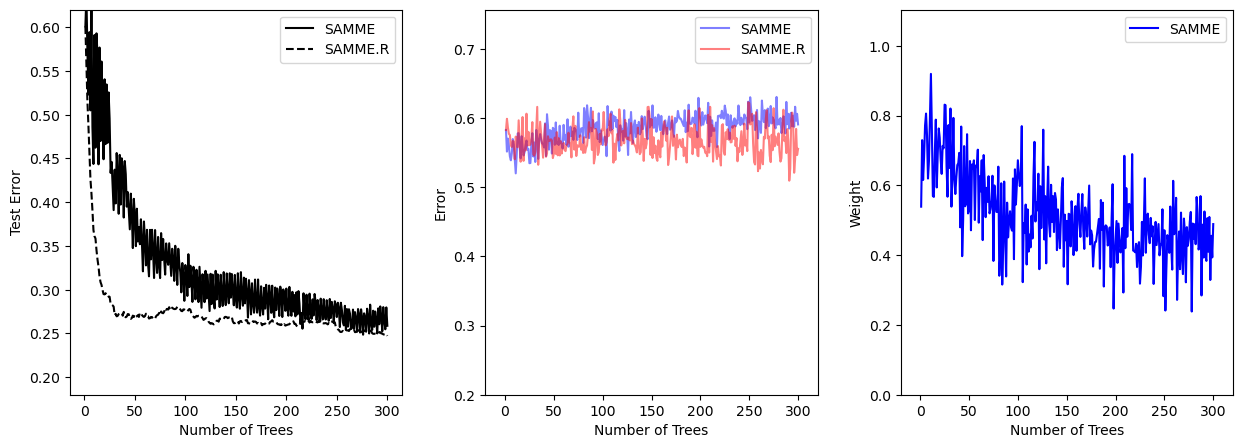

In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

#### Two-class AdaBoost

Este exemplo se ajusta a um toco de decisão AdaBoosted em um separável não linearmente conjunto de dados de classificação composto por dois clusters de "quantis gaussianos" (ver ) e traça a decisão limites e pontuações de decisão. As distribuições dos escores de decisão são mostradas separadamente para amostras das classes A e B. O rótulo de classe previsto para cada A amostra é determinada pelo sinal da pontuação de decisão. Amostras com decisão escores maiores que zero são classificados como B, sendo classificados de outra forma como A. A magnitude de um escore de decisão determina o grau de semelhança com o rótulo de classe prevista. Além disso, um novo conjunto de dados poderia ser construído contendo uma pureza desejada da classe B, por exemplo, selecionando apenas amostras com escore de decisão acima de algum valor.

C:\Users\natha\AppData\Local\Temp\ipykernel_776\839690995.py:51: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


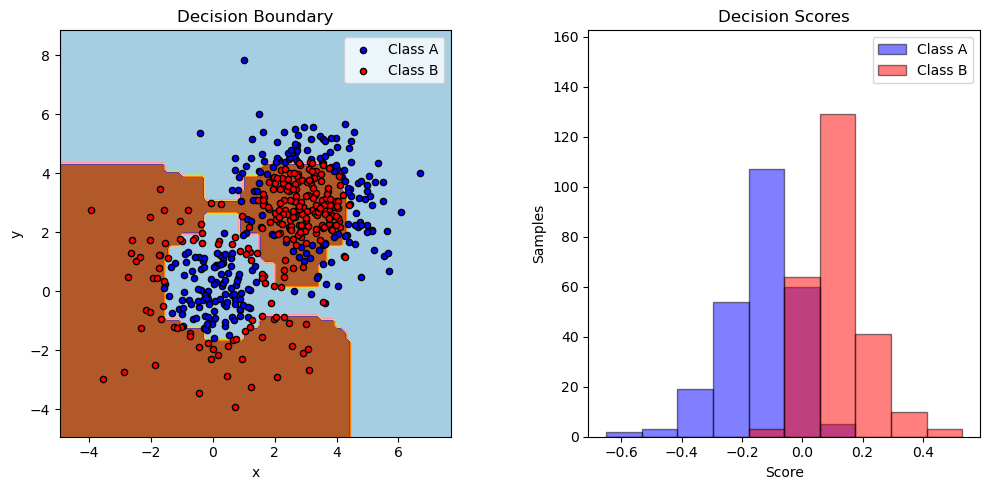

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.inspection import DecisionBoundaryDisplay


# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

#### Regressão da árvore de decisão com o AdaBoost

Uma árvore de decisão é impulsionada usando o algoritmo AdaBoost.R2 [1] em um 1D conjunto de dados senoidal com uma pequena quantidade de ruído gaussiano. 299 impulsos (300 árvores de decisão) são comparados com uma única árvore de decisão Regressor. À medida que o número de impulsos é aumentado, o regressor pode se encaixar mais detalhe.

In [4]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [5]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

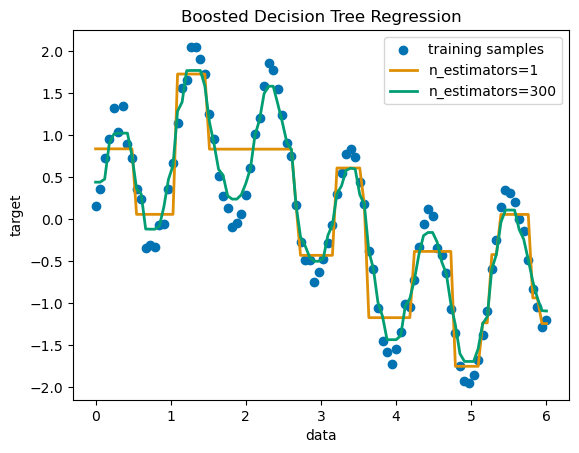

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# 3

#### 1: base_estimator: Esta é a base learner usado nos algoritmos AdaBoost. O learner padrão e mais comum é um toco de árvore de decisão (uma árvore de decisão com max_profundidade=1), conforme discutimos anteriormente.
#### 2: n_estimators: O número máximo de estimadores (modelos) para treinar sequencialmente. O padrão é 50. Mediremos o efeito desse hiperparâmetro em breve.
#### 3: learning_rate: determina o peso aplicado a cada estimador no processo de boosting. O padrão é 1. Valores menores, como 0,05, 0,1, forçam o algoritmo a treinar mais lentamente, mas com pontuações de alto desempenho. Mediremos o efeito desse hiperparâmetro em breve.
#### 4: max_depth: O hiperparâmetro max_depth controla a profundidade máxima da árvore de decisão. Esse hiperparâmetro pode ajudar a evitar o sobreajuste, limitando o número de recursos que o modelo pode considerar durante o treinamento.
#### 5: min_samples_split: Esse hiperparâmetro define o número mínimo de amostras necessárias para dividir um nó em uma árvore de decisão. Um valor baixo pode levar a overfitting, enquanto um valor alto pode tornar a árvore muito rasa e incapaz de aprender com dados mais complexos.